# Postdam PM2.5 Traditional Forcasting

* Between 2013 and 2023, data collected by DEBB021 was used.
* To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [1]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

In [ ]:
# import src
import model_base as mb
import traditional as td

## Data Exploration

* Load Data


In [ ]:
# df= mb.get_cleaned_datetime_df()
# # Set Index
# df['Start'] = pd.to_datetime(df['Start'])
# mb.set_start_index(df, 'Start')
# df.head()


df_hourly, df_daily, df_weekly, df_monthly = mb.read_date_freq()


## TIMESTAMP INDEX
# HOURLY 
mb.set_start_date_time_index(df_hourly)


# DAILY 
mb.set_start_date_time_index(df_daily)


# WEEKLY 
mb.set_start_date_time_index(df_weekly)


# MONTHLY 
mb.set_start_date_time_index(df_monthly)


# ARIMA

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
ARIMA(p,d,q) are defined as follows:

p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.


# Model creation and Evolve

## Diagnose Fitted Model
* Standardized residual: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.
* Histogram: The density plot suggest normal distribution with mean slighlty shifted towards right.
* Theoretical Quantiles: Mostly the dots fall not in line with the red line, deviations would imply the distribution is skewed.
* Correlogram: The Correlogram, (or ACF plot) shows the residual errors are not autocorrelated. The ACF plot would imply that there is some pattern in the residual errors which are not explained in the model.

## Residuals
Residual should have ~0 mean. If residual has other than zero, then forecasts are biased. Adjusting bias is easy: if residual mean is other than zero them simply add mean value to all forecast then bias problem solved. if forecast residuals that do not contain these characteristics have room for improvements. Adding additional terms to our ETS or ARIMA model may alleviate this issue.


In [ ]:
# HOURLY
td.arimax_train_and_evolve(df_hourly)

In [ ]:
# # DAILY
td.arimax_train_and_evolve(df_daily, 'D')

In [ ]:
# # WEEKLY
td.arimax_train_and_evolve(df_weekly, 'W')

In [ ]:
# # MONTLY
td.arimax_train_and_evolve(df_monthly, 'M')

# Hyperparamater tuning for Arimax

In [ ]:
# hyperparamater tuning for Arimax

# # HOURLY
# hourly_best_params = td.tune_arimax(df_hourly)

# # DAILY
# daily_best_params = td.tune_arimax(df_daily)

# # WEEKLY
# weekly_best_params = td.tune_arimax(df_weekly)

# # MONTHLY
# monthly_best_params = td.tune_arimax(df_monthly)

## TS Data Load 

In [ ]:
df_hourly_ts, df_daily_ts, df_weekly_ts, df_monthly_ts = mb.read_timestamp_freq()

# HOURLY 
mb.set_start_time_index(df_hourly_ts)

# DAILY 
mb.set_start_time_index(df_daily_ts)

# WEEKLY 
mb.set_start_time_index(df_weekly_ts)

# MONTHLY 
mb.set_start_time_index(df_monthly_ts)

# Support Vector Regression (SVR) Forcasting  

Support Vector Regression (SVR) is an application of the Support Vector Machine (SVM) algorithm for regression problems. SVM is a supervised learning algorithm commonly used for classification tasks, but it can also be adapted for regression, resulting in the SVR model. SVR attempts to find the best fit line (in a higher-dimensional space) that has the maximum number of points within a certain threshold distance from the line. The main idea is to minimize error, individualizing the hyperplane that maximizes the margin.

In SVR:

* The goal is to find a function that has at most an epsilon deviation from the actually obtained targets y for all the training data, and at the same time is as flat as possible.
* SVR uses the same principles as SVM for classification, with only a few minor differences. First, because output is a real number it becomes very hard to predict the information at hand, which has infinite possibilities. In the case of regression, a margin of tolerance (epsilon) is set in approximation to the SVM.

In [ ]:
# Hourly
td.svr_train_and_evolve(df_hourly_ts)

# Daily
td.svr_train_and_evolve(df_daily_ts)

# Weekly
td.svr_train_and_evolve(df_weekly_ts)

# Monthly
td.svr_train_and_evolve(df_monthly_ts)


# HyperPramater Tuning SVR

In [ ]:
# Hourly
hourly_svr_estimater_model = sv.svr_tune_and_evaluate(df_hourly_ts)

# Daily
daily_svr_estimater_model = sv.svr_tune_and_evaluate(df_daily_ts)

# Weekly
weekly_svr_estimater_model = sv.svr_tune_and_evaluate(df_weekly_ts)

# Monthly
monthly_svr_estimater_model = sv.svr_tune_and_evaluate(df_monthly_ts)

In [ ]:
# Multi Linear Regression

In [ ]:
# Hourly
td.linear_train_and_evolve(df_hourly_ts)

# Daily
td.linear_train_and_evolve(df_daily_ts)

# Weekly
td.linear_train_and_evolve(df_weekly_ts)

# Monthly
td.linear_train_and_evolve(df_monthly_ts)

In [9]:
df_hourly_ts, df_daily_ts, df_weekly_ts, df_monthly_ts = mb.read_timestamp_freq()

# HOURLY 
mb.set_start_time_index(df_hourly_ts)

# DAILY 
mb.set_start_time_index(df_daily_ts)

# WEEKLY 
mb.set_start_time_index(df_weekly_ts)

# MONTHLY 
mb.set_start_time_index(df_monthly_ts)

# Support Vector Regression (SVR) Forcasting  

Support Vector Regression (SVR) is an application of the Support Vector Machine (SVM) algorithm for regression problems. SVM is a supervised learning algorithm commonly used for classification tasks, but it can also be adapted for regression, resulting in the SVR model. SVR attempts to find the best fit line (in a higher-dimensional space) that has the maximum number of points within a certain threshold distance from the line. The main idea is to minimize error, individualizing the hyperplane that maximizes the margin.

In SVR:

* The goal is to find a function that has at most an epsilon deviation from the actually obtained targets y for all the training data, and at the same time is as flat as possible.
* SVR uses the same principles as SVM for classification, with only a few minor differences. First, because output is a real number it becomes very hard to predict the information at hand, which has infinite possibilities. In the case of regression, a margin of tolerance (epsilon) is set in approximation to the SVM.

Training set size: 43824
Validation set size: 17529
Test set size: 26295
MAE: 2.4167
MSE: 15.9505
RMSE: 3.9938
MAPE: 0.2755
MASE: 1.9484017177969497
MAE: 1.7331
MSE: 8.1478
RMSE: 2.8544
MAPE: 0.2333
MASE: 1.6906797037305976


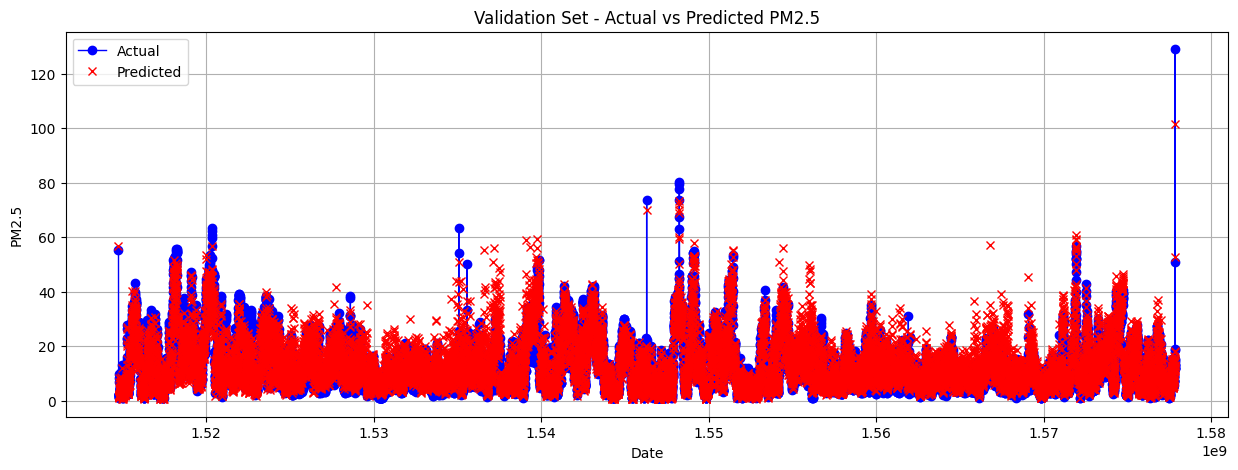

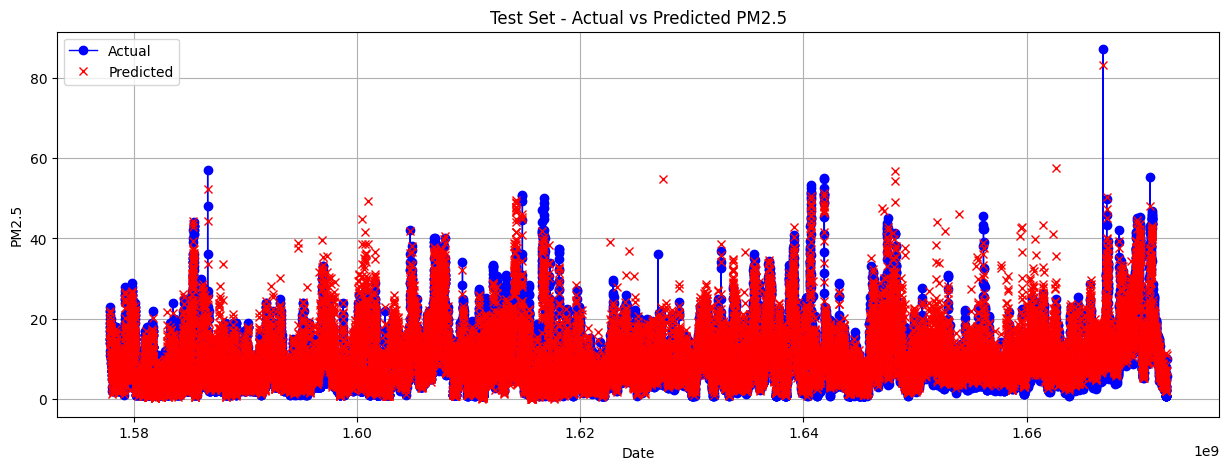

Training set size: 1826
Validation set size: 730
Test set size: 1096
MAE: 2.2056
MSE: 10.6079
RMSE: 3.2570
MAPE: 0.2389
MASE: 0.5203509170803658
MAE: 1.5553
MSE: 4.9671
RMSE: 2.2287
MAPE: 0.2017
MASE: 0.4572263322466379


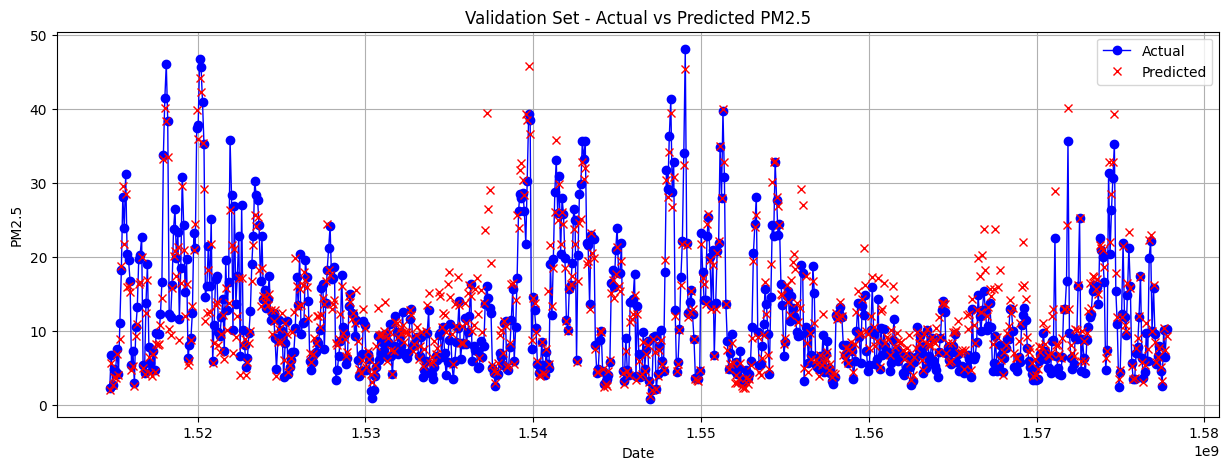

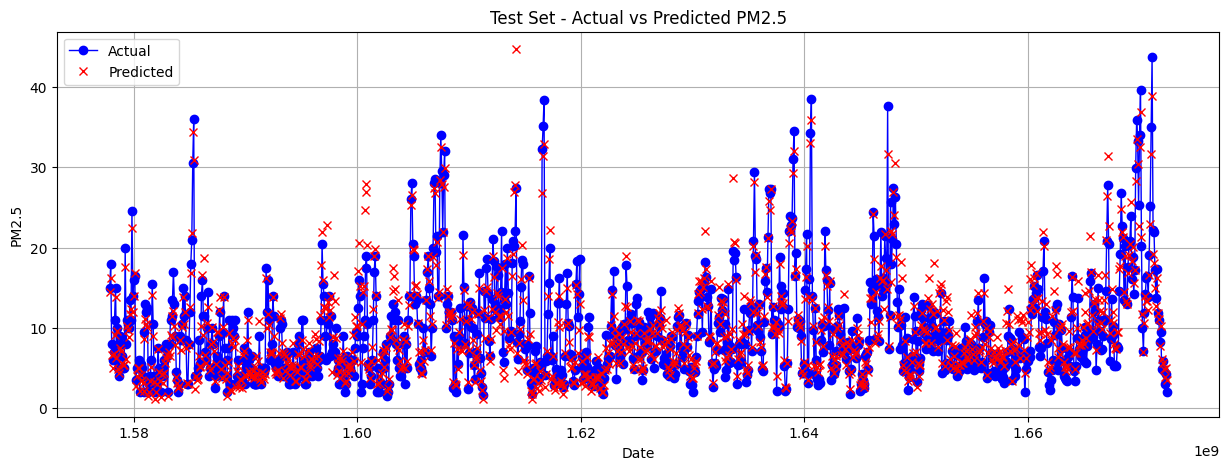

Training set size: 261
Validation set size: 104
Test set size: 157
MAE: 1.8938
MSE: 6.0350
RMSE: 2.4566
MAPE: 0.1839
MASE: 0.3602197468239772
MAE: 1.1776
MSE: 2.6258
RMSE: 1.6204
MAPE: 0.1423
MASE: 0.30829708028285985


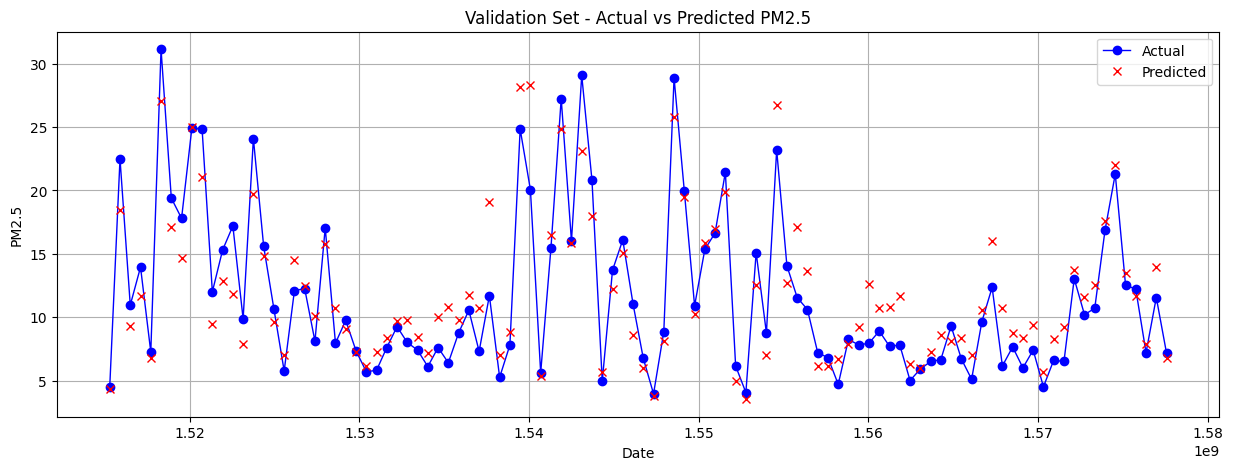

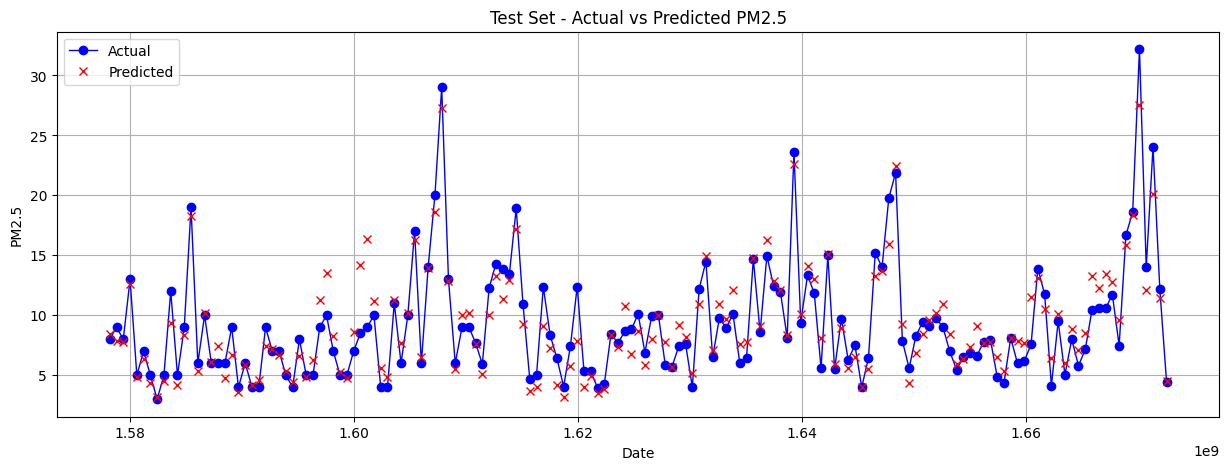

Training set size: 60
Validation set size: 24
Test set size: 36
MAE: 1.5529
MSE: 3.7471
RMSE: 1.9357
MAPE: 0.1549
MASE: 0.3665199655631447
MAE: 0.8586
MSE: 1.1147
RMSE: 1.0558
MAPE: 0.1064
MASE: 0.29293929153750903


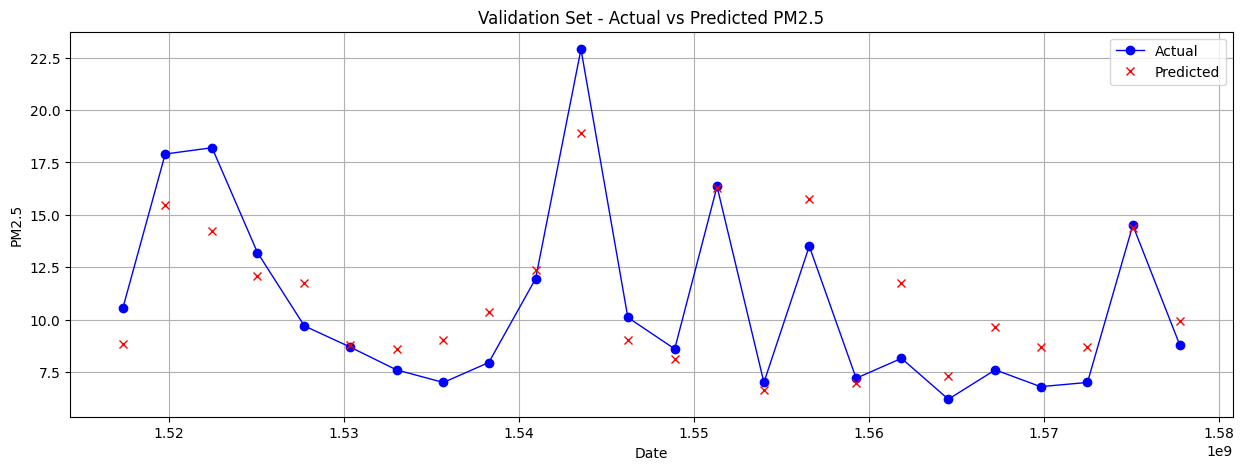

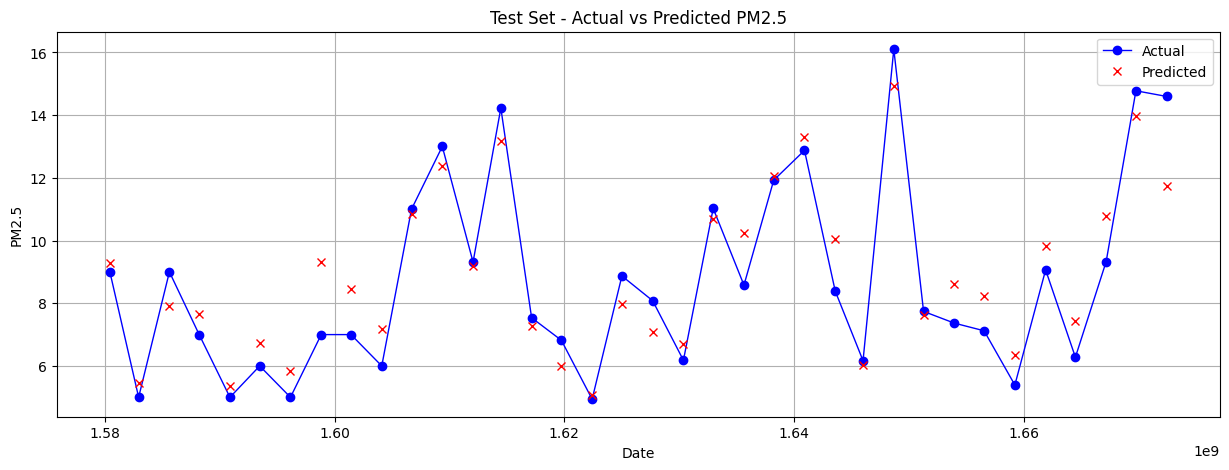

In [10]:
# Hourly
td.svr_train_and_evolve(df_hourly_ts)

# Daily
td.svr_train_and_evolve(df_daily_ts)

# Weekly
td.svr_train_and_evolve(df_weekly_ts)

# Monthly
td.svr_train_and_evolve(df_monthly_ts)


# HyperPramater Tuning SVR

In [11]:
# Hourly
hourly_svr_estimater_model = sv.svr_tune_and_evaluate(df_hourly_ts)

# Daily
daily_svr_estimater_model = sv.svr_tune_and_evaluate(df_daily_ts)

# Weekly
weekly_svr_estimater_model = sv.svr_tune_and_evaluate(df_weekly_ts)

# Monthly
monthly_svr_estimater_model = sv.svr_tune_and_evaluate(df_monthly_ts)

NameError: name 'sv' is not defined

# Multi Linear Regression

In [ ]:
# Hourly
td.linear_train_and_evolve(df_hourly_ts)

# Daily
td.linear_train_and_evolve(df_daily_ts)

# Weekly
td.linear_train_and_evolve(df_weekly_ts)

# Monthly
td.linear_train_and_evolve(df_monthly_ts)